# Extract Part

In [2]:
#Locate all three CSV files/data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib notebook
confirmed_csv_file = "/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/Data Branch/time_series_covid19_confirmed_global.csv"
recovered_csv_file = "/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/Data Branch/time_series_covid19_deaths_global.csv"
deaths_csv_file = "/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/Data Branch/time_series_covid19_recovered_global.csv"

In [3]:
# Read confirmed cases csv file and display rows
confirmed_df = pd.read_csv(confirmed_csv_file)
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [4]:
# Read confirmed cases csv file and display rows
recovered_df = pd.read_csv(recovered_csv_file)
recovered_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Read death cases csv file and display rows
deaths_df = pd.read_csv(deaths_csv_file)
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Checking data types
confirmed_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/23/20             int64
3/24/20             int64
3/25/20             int64
3/26/20             int64
3/27/20             int64
Length: 70, dtype: object

In [13]:
# Checking data types
recovered_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/23/20             int64
3/24/20             int64
3/25/20             int64
3/26/20             int64
3/27/20             int64
Length: 70, dtype: object

In [14]:
# Checking data types
deaths_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/23/20             int64
3/24/20             int64
3/25/20             int64
3/26/20             int64
3/27/20             int64
Length: 70, dtype: object

## Transform

In [7]:
def cleandata(df):
    #Drop the "Province/State","Lat" & "Long" columns
    #Select columns of index and "Country/Region", and only dates in March
    #Group by "Country/Region" and caculate the sum value
    #Reset the index of the dataframe
    cleandf = df.drop(columns=['Province/State','Lat','Long']).\
                    iloc[:,np.r_[0:1,40:67]].\
                    groupby('Country/Region').sum().\
                    reset_index()
    return cleandf

In [9]:
#Clean the "confirmed_data_df" data
confirmed_clean_df = cleandata(confirmed_df)
confirmed_clean_df

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,1,1,1,1,1,1,1,4,4,...,22,22,24,24,40,40,74,84,94,110
1,Albania,0,0,0,0,0,0,0,0,2,...,59,64,70,76,89,104,123,146,174,186
2,Algeria,1,3,5,12,12,17,17,19,20,...,74,87,90,139,201,230,264,302,367,409
3,Andorra,0,1,1,1,1,1,1,1,1,...,39,53,75,88,113,133,164,188,224,267
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,36,42,42,70,70,77,84,91,107,107
172,Vietnam,16,16,16,16,16,16,18,30,30,...,75,85,91,94,113,123,134,141,153,163
173,West Bank and Gaza,0,0,0,0,4,7,16,16,19,...,41,44,47,48,52,59,59,59,84,91
174,Zambia,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,12,16,22


In [10]:
#Clean the "confirmed_data_df" data
recovered_clean_df = cleandata(recovered_df)
recovered_clean_df

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,Algeria,0,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
172,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
174,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Clean the "confirmed_data_df" dataset
death_clean_df = cleandata(deaths_df)
death_clean_df

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,15,15,15,15,15,31
172,Vietnam,16,16,16,16,16,16,16,16,16,...,16,16,16,17,17,17,17,17,20,20
173,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,17,17,17,17,17,17,17,17
174,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#check the data of confirmed data "Country/Region" column is the same as death data
confirmed_clean_df["Country/Region"].equals(death_clean_df["Country/Region"])

True

In [27]:
#check the data of recovered data "Country/Region" column is the same as death data
recovered_clean_df["Country/Region"].equals(death_clean_df["Country/Region"])


True

In [28]:
#Import module 
import datetime
import os

In [12]:
#Function to convert columns of dates into one new column

def convertdate(clean_df):
    #Convert columns of dates into a new column 'Date', and store the data in a new column 'Number'
    converted = pd.melt(clean_df, id_vars=["Country/Region"], 
                  var_name="Date", value_name="Number")
    #Convert the data type from string to datetime64 for the data in column 'Date' 
    converted['Date'] = pd.to_datetime(converted['Date'])
    #Sort the dataset by "Country/Region" and "Date"
    converted_df = converted.sort_values(by=["Country/Region","Date"])
    
    return converted_df

In [13]:
#Apply convert function
confirmed_convert_df = convertdate(confirmed_clean_df)
recovered_convert_df = convertdate(recovered_clean_df)
deaths_convert_df = convertdate(death_clean_df)


deaths_convert_df


,Country/Region,Date,Number
0,Afghanistan,2020-03-01,0
176,Afghanistan,2020-03-02,0
352,Afghanistan,2020-03-03,0
528,Afghanistan,2020-03-04,0
704,Afghanistan,2020-03-05,0
...,...,...,...
4047,Zimbabwe,2020-03-23,0
4223,Zimbabwe,2020-03-24,0
4399,Zimbabwe,2020-03-25,0
4575,Zimbabwe,2020-03-26,0


In [15]:
#Function to calculate the daily increase of cases

def dailychange(convert_df):
    #Change the index in order to apply diff() function
    convert_df = convert_df.set_index(['Country/Region','Date'])
    
    #Create a new column to store the difference between rows
    convert_df['amount_of_increase']=convert_df.diff()
    
    #Change back the index
    convert_df=convert_df.reset_index()
    
    #Run a for loop to check the boundary rows where the 'Country' changes, and change the value of difference to 0
    for i in range(0,int(convert_df.index.size)-1):
        if convert_df['Country/Region'][i] != convert_df['Country/Region'][i+1]:
            convert_df.at[i+1,'amount_of_increase'] = 0
        else:
            pass
    
    #Fill all NaN with 0
    convert_df=convert_df.fillna(0)
    
    return convert_df

In [16]:
#Apply the function
confirmed_daily_df = dailychange(confirmed_convert_df)
recovered_daily_df = dailychange(recovered_convert_df)
deaths_daily_df = dailychange(deaths_convert_df)
pd.set_option('display.max_rows', None)
deaths_daily_df

,Country/Region,Date,Number,amount_of_increase
0,Afghanistan,2020-03-01,0,0.0
1,Afghanistan,2020-03-02,0,0.0
2,Afghanistan,2020-03-03,0,0.0
3,Afghanistan,2020-03-04,0,0.0
4,Afghanistan,2020-03-05,0,0.0
5,Afghanistan,2020-03-06,0,0.0
6,Afghanistan,2020-03-07,0,0.0
7,Afghanistan,2020-03-08,0,0.0
8,Afghanistan,2020-03-09,0,0.0
9,Afghanistan,2020-03-10,0,0.0


In [17]:
#Rename the columns
confirmed_daily_df.columns=['country','date','accumulated_confirmed','increase_of_confirmed']
recovered_daily_df.columns=['country','date','accumulated_recovered','increase_of_recovered']
deaths_daily_df.columns=['country','date','accumulated_deaths','increase_of_deaths']

In [18]:
# Turning the last colum of each DataFrame into an integer

confirmed_daily_df["increase_of_confirmed"] = confirmed_daily_df["increase_of_confirmed"].astype(int)
recovered_daily_df["increase_of_recovered"] = recovered_daily_df["increase_of_recovered"].astype(int) 
deaths_daily_df["increase_of_deaths"] = deaths_daily_df["increase_of_deaths"].astype(int)

In [19]:
deaths_daily_df.head(5)

,country,date,accumulated_deaths,increase_of_deaths
0,Afghanistan,2020-03-01,0,0
1,Afghanistan,2020-03-02,0,0
2,Afghanistan,2020-03-03,0,0
3,Afghanistan,2020-03-04,0,0
4,Afghanistan,2020-03-05,0,0


In [20]:
#Export datasets
confirmed_daily_df.to_csv(os.path.join('/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/cleandata','confirmed_clean_df.csv'), index=False)
recovered_daily_df.to_csv(os.path.join('/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/cleandata','recovered_clean_df.csv'), index=False)
deaths_daily_df.to_csv(os.path.join('/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/cleandata','deaths_clean_df.csv'), index=False)

# Load Part

In [22]:
# Importing the csv files

confirmed_cleaned_csv_path = os.path.join('/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/cleandata','confirmed_clean_df.csv')
recovered_cleaned_csv_path = os.path.join('/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/cleandata','recovered_clean_df.csv')
deaths_cleaned_csv_path = os.path.join('/Users/poojasreepasupuleti/Documents/covidETL/ETL-Project/cleandata','deaths_clean_df.csv')

# Applying the paths to their respective data frames

confirmed_cleaned_df = pd.read_csv(confirmed_cleaned_csv_path)
recovered_cleaned_df = pd.read_csv(recovered_cleaned_csv_path)
deaths_cleaned_df = pd.read_csv(deaths_cleaned_csv_path)

# Sanity Checking
print(confirmed_cleaned_df.head(5))
print("----------------------------------------------------------------------------------------")
# print(recovered_cleaned_df)
# print("----------------------------------------------------------------------------------------")
# print(deaths_cleaned_df)

       country        date  accumulated_confirmed  increase_of_confirmed
0  Afghanistan  2020-03-01                      1                      0
1  Afghanistan  2020-03-02                      1                      0
2  Afghanistan  2020-03-03                      1                      0
3  Afghanistan  2020-03-04                      1                      0
4  Afghanistan  2020-03-05                      1                      0
----------------------------------------------------------------------------------------


In [23]:
# pip3 install psycopg2-binary

In [24]:
from sqlalchemy import create_engine
connection_string = "postgres:poojas1234@localhost:5432/covid19_db"
engine = create_engine(f'postgresql://{connection_string}')

In [25]:
engine.table_names()

/Users/poojasreepasupuleti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


['confirmed', 'recovered', 'death']

In [26]:
confirmed_cleaned_df.to_sql(name='confirmed', con=engine, if_exists='append', index=False)
recovered_cleaned_df.to_sql(name='recovered', con=engine, if_exists='append', index=False)
deaths_cleaned_df.to_sql(name='death', con=engine, if_exists='append', index=False)

# Analysis

In [27]:
most_confirmed = pd.read_sql("""
                                SELECT country, sum(increase_of_confirmed) AS total_confirmed
                                FROM confirmed
                                GROUP BY country
                                ORDER BY SUM(increase_of_confirmed) DESC
                                LIMIT 5
                                """, con=engine)
most_confirmed

,country,total_confirmed
0,US,203166
1,Italy,169608
2,Spain,131270
3,Germany,101482
4,France,66544


<IPython.core.display.Javascript object>


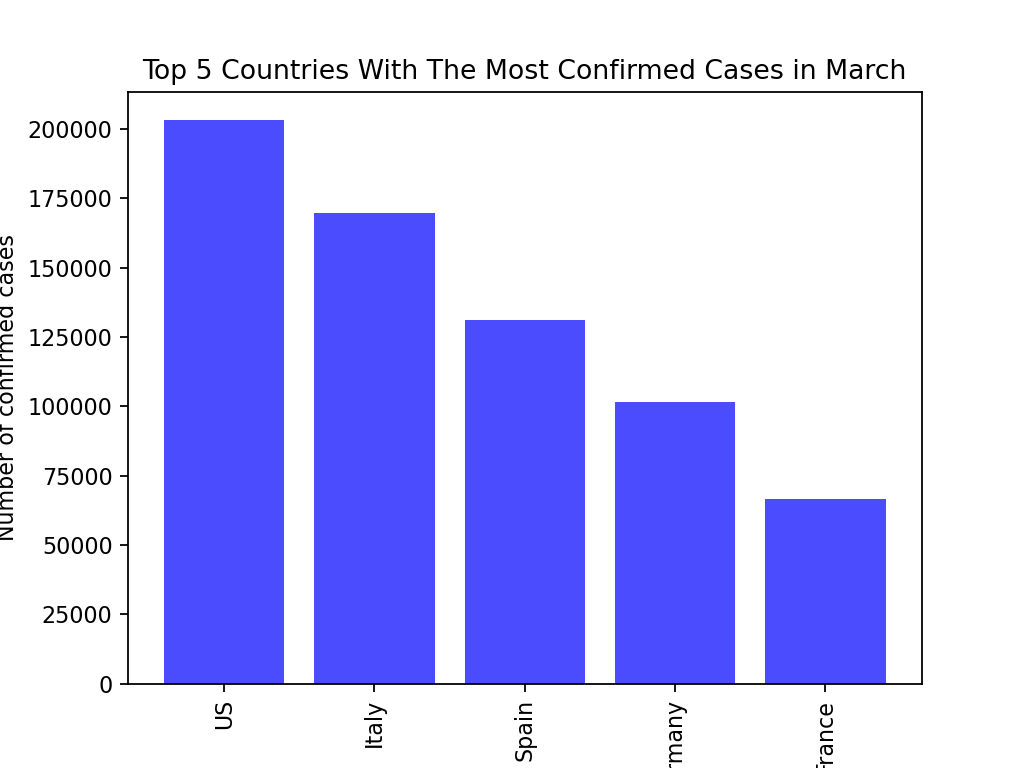

/Users/poojasreepasupuleti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


In [29]:
#Convert result from sql query into dataframe
most_confirmed_df = pd.DataFrame(most_confirmed)

#plot bar graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(most_confirmed_df['country'], most_confirmed_df['total_confirmed'], color='blue', alpha=0.7, align="center");
ax.set_xlabel("Country");
ax.set_ylabel("Number of confirmed cases");
ax.set_title("Top 5 Countries With The Most Confirmed Cases in March");
ax.set_xticklabels(most_confirmed_df['country'], rotation="vertical");

In [30]:
least_confirmed = pd.read_sql("""
                                SELECT country, SUM(increase_of_confirmed) AS total_confirmed
                                FROM confirmed
                                GROUP BY country
                                ORDER BY SUM(increase_of_confirmed) ASC
                                LIMIT 5
                                """, con=engine)
least_confirmed

,country,total_confirmed
0,Timor-Leste,2
1,Libya,2
2,Papua New Guinea,2
3,Saint Vincent and the Grenadines,2
4,Saint Kitts and Nevis,4


In [31]:
most_death = pd.read_sql("""
                                SELECT country, SUM(increase_of_deaths) AS total_death
                                FROM death
                                GROUP BY country
                                ORDER BY SUM(increase_of_deaths) DESC
                                LIMIT 5
                                """, con=engine)
most_death

,country,total_death
0,China,65116
1,Iran,21916
2,Italy,21734
3,Spain,18710
4,Germany,13284


<IPython.core.display.Javascript object>


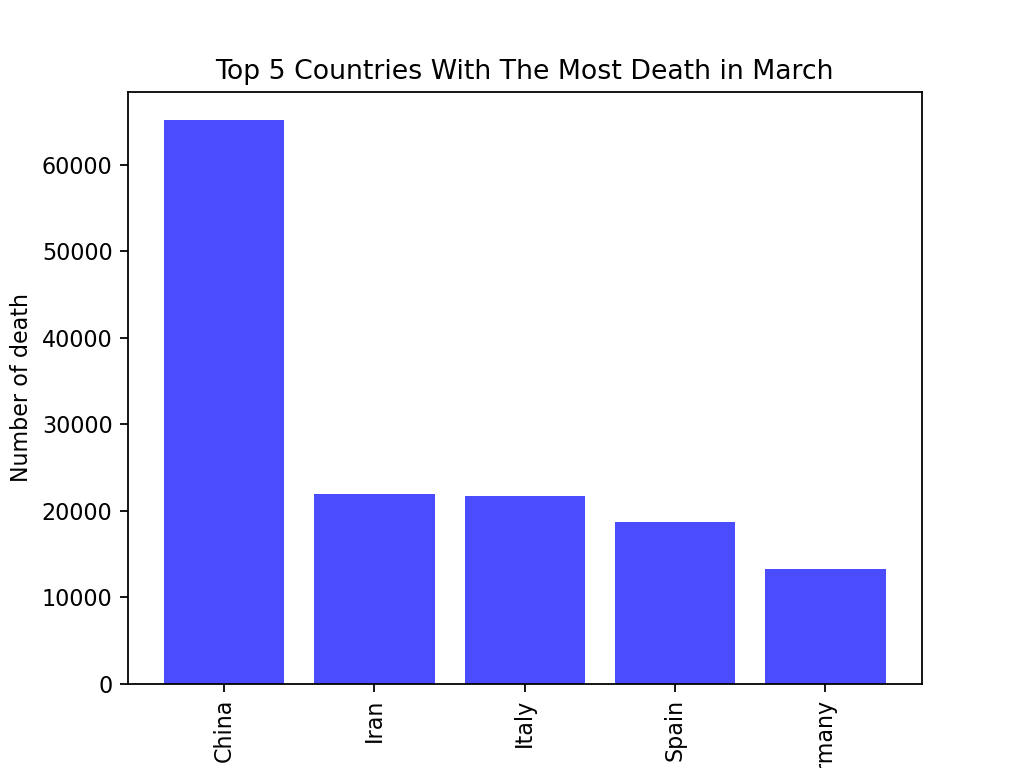

/Users/poojasreepasupuleti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


In [47]:
#Convert result from sql query into dataframe
most_death_df = pd.DataFrame(most_death)

#plot bar graph
fig2, ax2 = plt.subplots()
ax2.bar(most_death_df['country'], most_death_df['total_death'], color='blue', alpha=0.7, align="center");
ax2.set_xlabel("Country");
ax2.set_ylabel("Number of death");
ax2.set_title("Top 5 Countries With The Most Death in March");
ax2.set_xticklabels(most_death_df['country'], rotation="vertical");


In [48]:
least_death = pd.read_sql("""
                                SELECT country, SUM(increase_of_deaths) AS total_death
                                FROM death
                                GROUP BY country
                                ORDER BY SUM(increase_of_deaths) ASC
                                LIMIT 5
                                """, con=engine)
least_death

,country,total_death
0,Laos,0
1,Uganda,0
2,Papua New Guinea,0
3,Montenegro,0
4,Grenada,0


In [49]:
# Join all three tables
total = pd.read_sql("""
                    SELECT c.country
                        ,SUM(c.increase_of_confirmed) AS total_confirmed
                        ,SUM(d.increase_of_deaths) AS total_death
                        ,SUM(r.increase_of_recovered) AS total_recovered
                    FROM confirmed c
                        INNER JOIN death d ON c.country = d.country AND c.date = d.date
                        INNER JOIN recovered r ON r.country = c.country AND r.date = c.date
                    GROUP BY c.country
                    ORDER BY SUM(increase_of_deaths) DESC
                    LIMIT 5
                    """, con=engine)
total

,country,total_confirmed,total_death,total_recovered
0,China,15720,260464,3392
1,Iran,250832,87664,18592
2,Italy,678432,86936,72800
3,Spain,525080,74840,41104
4,Germany,405928,53136,2736


In [50]:
#5 countries with the highest number of recoveries
high_recoveries = pd.read_sql(
'''
SELECT 
    country
    ,SUM(increase_of_recovered) AS total_recovered 
FROM recovered GROUP BY country 
ORDER BY SUM(increase_of_recovered) 
DESC LIMIT 5;            
''', con=engine)
high_recoveries

,country,total_recovered
0,Italy,18200
1,Spain,10276
2,Iran,4648
3,France,3990
4,US,3160


In [51]:
#5 countries with the lowest number of recoveries
low_recoveries = pd.read_sql(
'''
SELECT 
    country
    ,SUM(increase_of_recovered) AS total_recovered 
FROM recovered 
GROUP BY country 
ORDER BY SUM(increase_of_recovered) ASC LIMIT 5;
''', con=engine)
low_recoveries


,country,total_recovered
0,Papua New Guinea,0
1,Sri Lanka,0
2,Cambodia,0
3,Uganda,0
4,Laos,0


In [52]:
#Date in March with the highest number of recoveries
high_recovery_date = pd.read_sql(
'''
SELECT 
    recovered.country
    ,recovered.date
    ,SUM(increase_of_recovered) AS total_recovered 
FROM recovered 
GROUP BY country, date 
ORDER BY SUM(increase_of_recovered) DESC LIMIT 1;
''', con=engine)
high_recovery_date

,country,date,total_recovered
0,Italy,2020-03-27,1838


In [53]:
#5 countries with the lowest number of recoveries
low_recoveries = pd.read_sql(
'''
SELECT 
    country
    ,SUM(increase_of_recovered) AS total_recovered 
FROM recovered 
GROUP BY country 
ORDER BY SUM(increase_of_recovered) ASC LIMIT 5;
''', con=engine)
low_recoveries

,country,total_recovered
0,Papua New Guinea,0
1,Sri Lanka,0
2,Cambodia,0
3,Uganda,0
4,Laos,0


In [54]:
#Date in March with the highest number of recoveries
high_recovery_date = pd.read_sql(
'''
SELECT 
    recovered.country
    ,recovered.date
    ,SUM(increase_of_recovered) AS total_recovered 
FROM recovered 
GROUP BY country, date 
ORDER BY SUM(increase_of_recovered) DESC LIMIT 1;
''', con=engine)
high_recovery_date



,country,date,total_recovered
0,Italy,2020-03-27,1838


In [55]:
#Date in March with the highest number of confirmed cases
high_confirmed_date = pd.read_sql(
'''
SELECT 
    confirmed.country
    ,confirmed.date
    ,SUM(confirmed.increase_of_confirmed) AS total_confirmed 
FROM confirmed 
GROUP BY confirmed.country, confirmed.date 
ORDER BY SUM(increase_of_confirmed) DESC LIMIT 1;
''', con=engine)
high_confirmed_date

,country,date,total_confirmed
0,US,2020-03-26,36116


In [56]:
#Date in March with the highest number of deaths
high_death_date = pd.read_sql(
    '''
SELECT 
    country
    ,date
    ,SUM(increase_of_deaths) AS total_deaths 
FROM death 
GROUP BY country, date ORDER 
BY SUM(increase_of_deaths) DESC LIMIT 1;
''', con=engine)
high_death_date

,country,date,total_deaths
0,Germany,2020-03-24,5954


In [57]:
Total_of_all_stats_per_date = pd.read_sql(
'''
SELECT 
    confirmed.country
    ,confirmed.date
    ,SUM(confirmed.increase_of_confirmed) AS total_confirmed
    ,SUM(recovered.increase_of_recovered) AS total_recovered
    ,SUM(death.increase_of_deaths) AS total_deaths 
FROM confirmed 
INNER JOIN death ON confirmed.country=death.country AND confirmed.date=death.date 
INNER JOIN recovered ON recovered.country=confirmed.country AND recovered.date=confirmed.date 
GROUP BY confirmed.country, confirmed.date
''', con=engine)
Total_of_all_stats_per_date


,country,date,total_confirmed,total_recovered,total_deaths
0,Afghanistan,2020-03-01,0,0,0
1,Afghanistan,2020-03-02,0,0,0
2,Afghanistan,2020-03-03,0,0,0
3,Afghanistan,2020-03-04,0,0,0
4,Afghanistan,2020-03-05,0,0,0
5,Afghanistan,2020-03-06,0,0,0
6,Afghanistan,2020-03-07,0,0,0
7,Afghanistan,2020-03-08,24,0,0
8,Afghanistan,2020-03-09,0,0,0
9,Afghanistan,2020-03-10,8,0,0


<IPython.core.display.Javascript object>


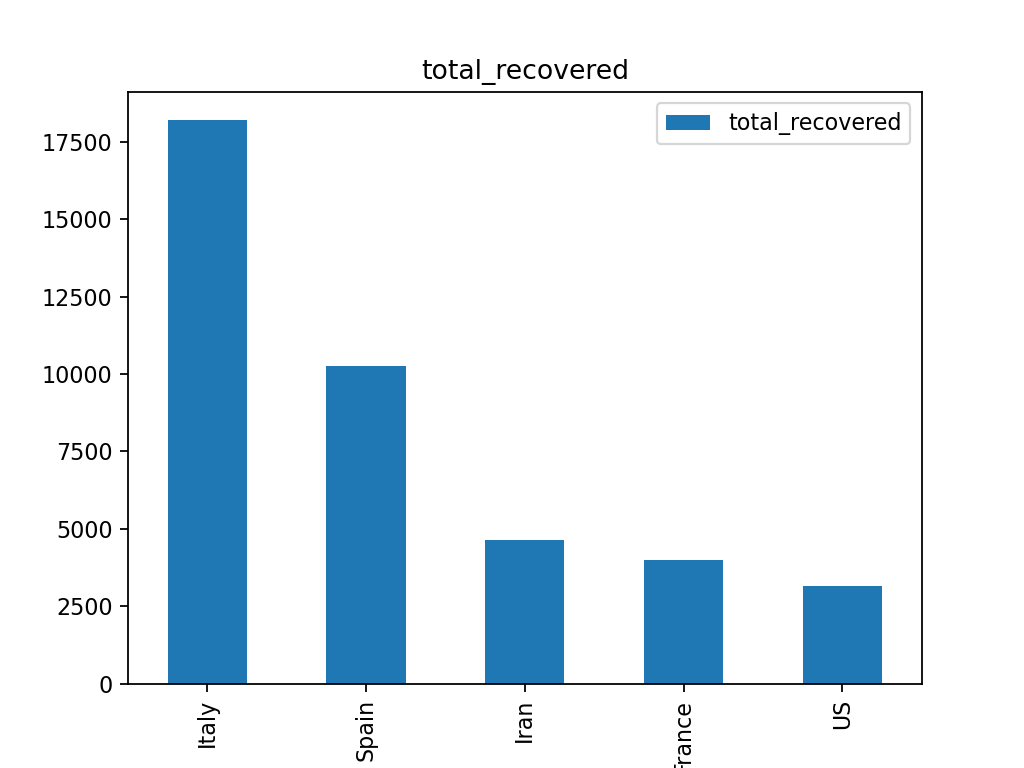

In [58]:
fig3, ax3 = plt.subplots()
high_recoveries.plot.bar(ax=ax3, x='country',y='total_recovered', subplots=True);
# fig3.savefig(os.path.join('images','total_recovered.png'))

<IPython.core.display.Javascript object>


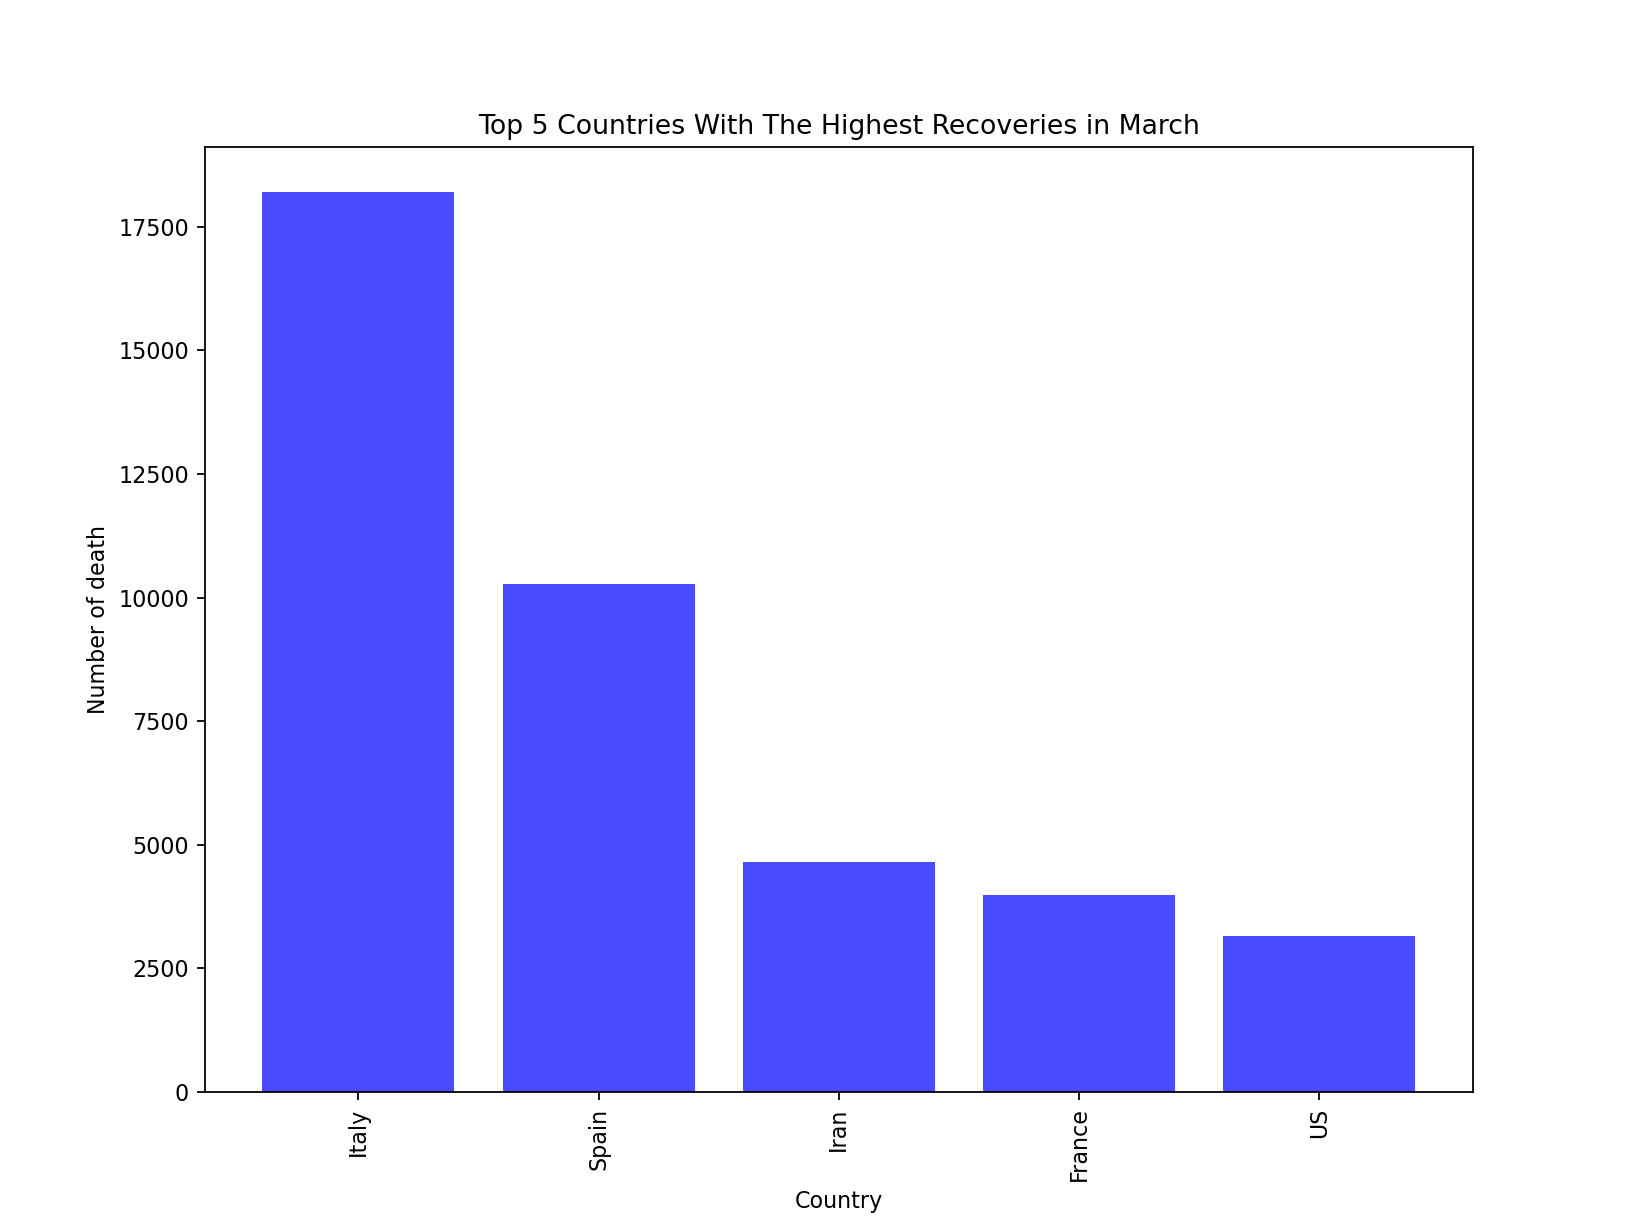

/Users/poojasreepasupuleti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


In [60]:
#Convert result from sql query into dataframe
most_death_df = pd.DataFrame(high_recoveries)

#plot bar graph
fig4, ax4 = plt.subplots()
ax4.bar(high_recoveries['country'], high_recoveries['total_recovered'], color='blue', alpha=0.7, align="center");
ax4.set_xlabel("Country");
ax4.set_ylabel("Number of death");
ax4.set_title("Top 5 Countries With The Highest Recoveries in March");
ax4.set_xticklabels(high_recoveries['country'], rotation="vertical");
